<h3 style="color: #001a79;">Exercise 1</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

<hr style="border-top: 1px solid #001a79;" />

In [7]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

Let's generate some data to play with. Going to use the random number generator associated with NumPy

In [8]:
# assigning new variables
s = np.arange(0.0, 21.0, 1.0)
g = 5.0 * s + 10.0 + np.random.normal(0.0, 5.0, s.size)

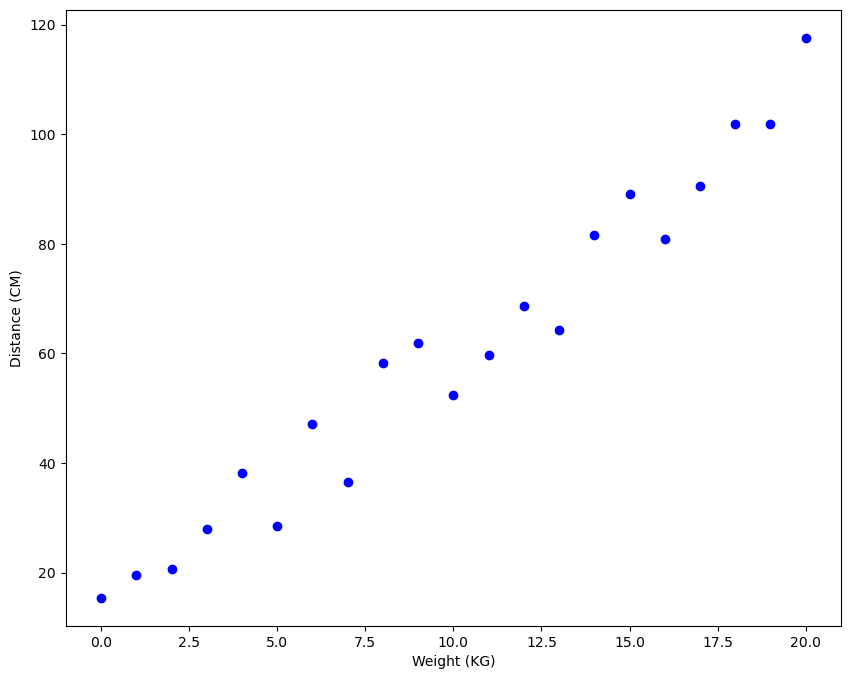

In [9]:
# Now let's create a plot
# to ensure plots display
%matplotlib inline 

plt.plot(s, g, 'bo')

# Set some properties for the plot.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

Just like our examples, the points are not linear but they are quite close.

Let's plot some lines over our data, some best guesses.

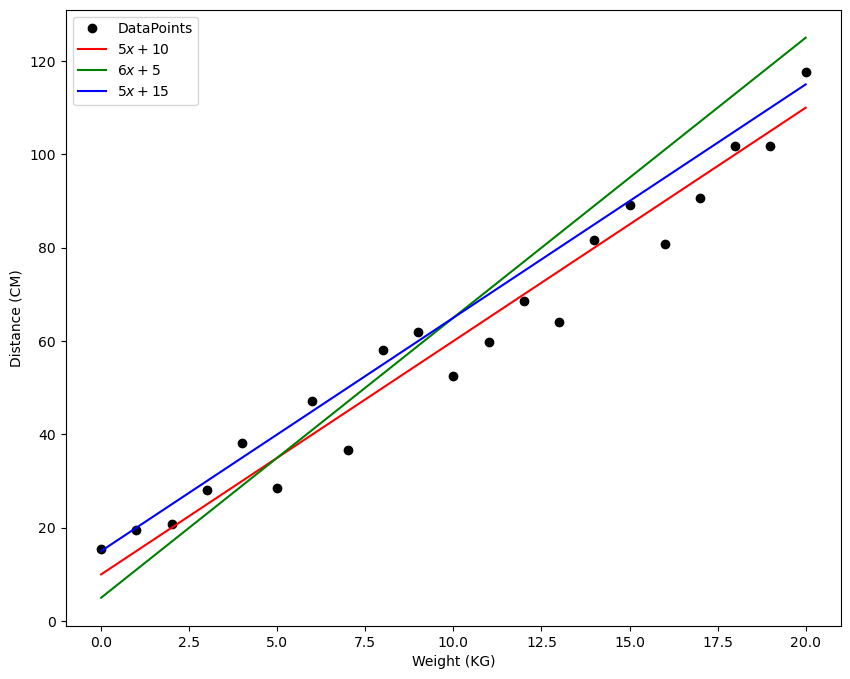

In [10]:
# Plot w versus d with black dots.
plt.plot(s, g, 'ko', label="DataPoints")

# Overlay some lines on the plot.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, 5.0 * x + 10.0, 'r-', label=r"$5x + 10$")
plt.plot(x, 6.0 * x +  5.0, 'g-', label=r"$6x +  5$")
plt.plot(x, 5.0 * x + 15.0, 'b-', label=r"$5x + 15$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

Just like our example, the lines here are all quite close to the spread of the data. Now it is time to move along to Costing. Remember, this is our definiton of Cost: $$ Cost(m, c) = \sum_i (y_i - mx_i - c)^2 $$ 
However, we are going to use absolute values. [1]

In [11]:
# Calculate the cost of the lines above for the data above.
cost = lambda m,c: np.sum(np.abs(([(g[i] - m * s[i] - c) for i in range(s.size)])))

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 10.0, cost(5.0, 10.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0,  5.0, cost(6.0,  5.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, cost(5.0, 15.0)))

Cost with m =  5.00 and c = 10.00:   115.80
Cost with m =  6.00 and c =  5.00:   204.57
Cost with m =  5.00 and c = 15.00:   129.43


When comparing with the results in our example, we have no absolutely clear 'best-line' although it does appear that m=5.00 and c=10.00 is a strong contender. Now lets go looking at minimising this cost.

In [12]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of s and g.
s_avg = np.mean(s)
g_avg = np.mean(g)

# Subtract means from w and d.
s_zero = s - s_avg
g_zero = g - g_avg

# The best m is found by the following calculation.
m = np.sum(s_zero * g_zero) / np.sum(s_zero * s_zero)
# Use m from above to calculate the best c.
c = g_avg - m * s_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 4.737046 and c is 12.743056.


In [13]:
# using in-built function to double-check my 'manual' results
np.polyfit(s, g, 1)

array([ 4.73704576, 12.74305618])

Re-assuring that these values are the same as per the examples. 
Now let's get plotting those points based on our obtained values for m and c. 

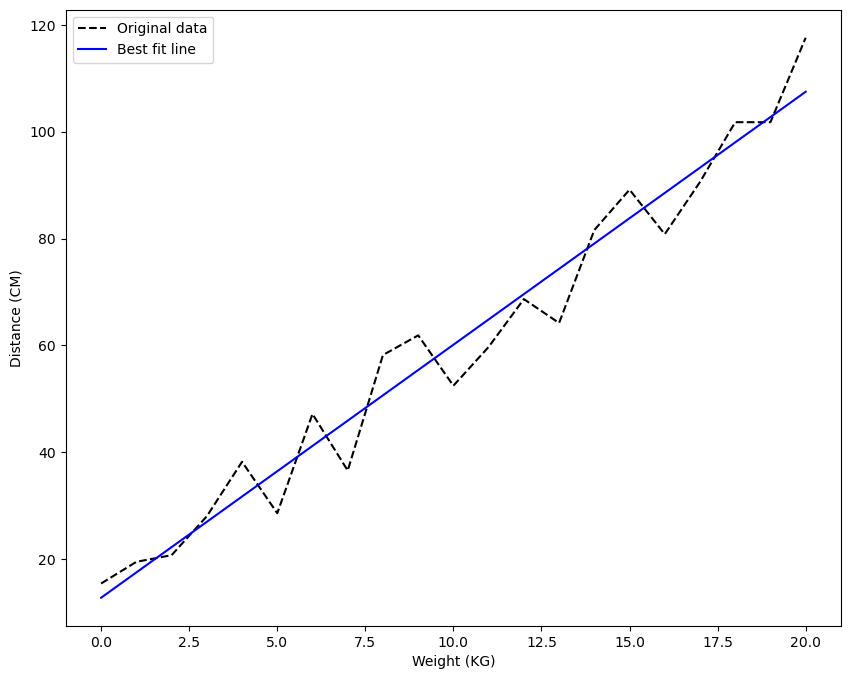

In [14]:
# Plot the best fit line.
plt.plot(s, g, 'k--', label='Original data')
plt.plot(s, m * s + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.legend()

# Show the plot.
plt.show()

In [15]:
# as a final tie-off, let's examine the cost associated with our determined m and c values. 
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))


Cost with m =  4.74 and c = 12.74:   107.95


References for this task:

[1] https://jermwatt.github.io/machine_learning_refined/notes/5_Linear_regression/5_3_Absolute.html

[2] https://www.analyticsvidhya.com/blog/2021/03/data-science-101-introduction-to-cost-function/

<h4>Overall take on why we square and not take absolute values: <h4>


In plain English, we can describe the problem this way. We already know that we could draw a bunch of dotted lines on a scatterplot
and measure the total distance of all those lines. We could then try different regression lines and repeat the process. We would prefer
to find a quick and easy way to find the line that minimizes the sum of the errors. Using absolute values does not make the process
any easier for us. In fact, using absolute values requires us to basically go through the entire process of drawing regression lines,
measuring the error distances, and summing those errors. We could use a computer to do this (using something called Wesolowsky’s
direct descent method), but we still wouldn’t understand what’s going on.
Let me stress that we would really like to use those absolute value bars in our formula. Absolute values are the easiest way to make all
values positive and absolute values make sense. We simply choose not to use absolute values because of the difficulties we
have in working with them mathematically.


<h3 style="color: #001a79;">Exercise 2</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Fit a straight line to the following data points, using all three methods used above.

Do you think a straight line is a good model for these points?

```python
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]
```

<hr style="border-top: 1px solid #001a79;" />

<h4 style="color: #001a79;">Method 1 (Squares)</h4>


In [18]:
# for clarity, let's bring in our datapoints to this section
w = np.arange(2.0, 21.0, 1.0) # changing our type to prevent 'TypeError'
d = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

In [19]:
# again for clarity, lets re-import numpy and other required packages.
import numpy as np

import matplotlib.pyplot as plt


# Setting default plot size.
plt.rcParams['figure.figsize'] = (10, 8)

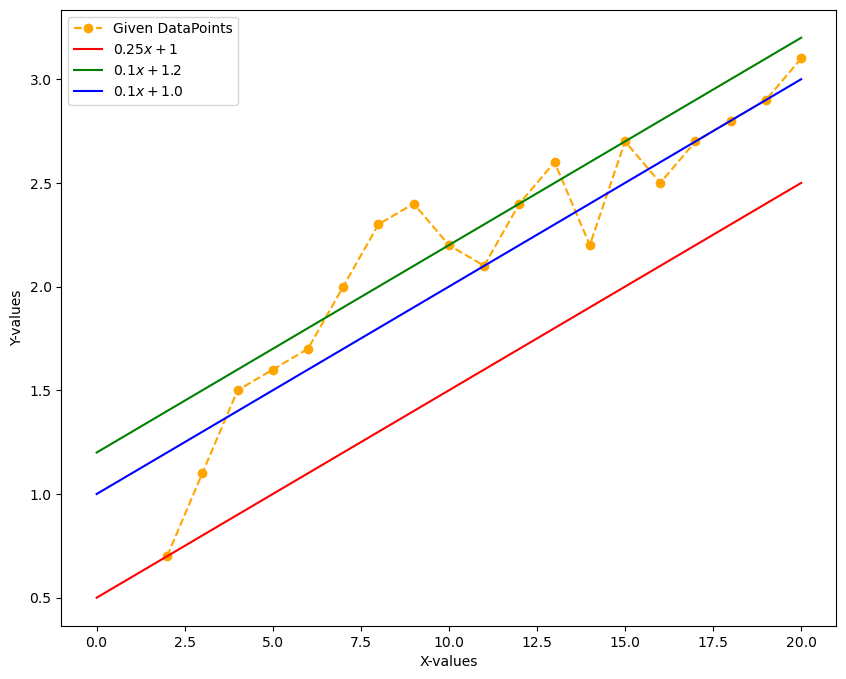

In [20]:
# to ensure plots display
%matplotlib inline 

# Plot w versus d with oragen dashed lines.
plt.plot(w, d, color='orange', marker='o', linestyle='dashed', label="Given DataPoints")

# Overlay some lines on the plot.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, 0.1 * x + 0.5, 'r-', label=r"$0.25x + 1$")
plt.plot(x, 0.1 * x +  1.2, 'g-', label=r"$0.1x +  1.2$")
plt.plot(x, 0.1 * x + 1.0, 'b-', label=r"$0.1x + 1.0$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('X-values')
plt.ylabel('Y-values')

# Show the plot.
plt.show()

Now lets move onto the costing section - I'm not sure if this was intended as the Scope but I do wish to complete this whole section as described in lectures for my own understanding.

So we have already defined our cost function. Our job now is to see which of our lines best fits the data or even if another line exists that better defines the data. Looking at our chosen datapoints, it is very likely there exists another line that best fits the data.
$$ \sum_i (y_i - mx_i - c)^2 $$

Let's perform our least squares fitting.

In [21]:
# Calculate the cost of the lines above for the data above.
cost = lambda m,c: np.sum([(d[i] - m * w[i] - c)**2 for i in range(19)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.25, 1.0, cost(0.25, 1.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.1,  1.2, cost(0.1,  1.2)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.1, 1.0, cost(0.1, 1.0)))

Cost with m =  0.25 and c =  1.00:    59.91
Cost with m =  0.10 and c =  1.20:     1.30
Cost with m =  0.10 and c =  1.00:     1.18


So from first glance, these numbers are not too bad. Our first set of points are okay but not near as close as the following two points. So lets move onto trying to minimise our cost. Some notes to observe in our following code: 

We first calculate the mean (average) values of our <i>x</i> values and that of our <i>y</i> values.
Then we subtract the mean of <i>x</i> from each of the <i>x</i> values, and the mean of <i>y</i> from each of the <i>y</i> values.
Then we take the dot product of the new <i>x</i> values and the new <i>y</i> values and divide it by the dot product of the new <i>x</i> values with themselves.

That gives us  <i>m</i>, and we use <i>m</i> to calculate <i>c</i> .

As is the case with our example, I changed 'x' and 'y' to 'w' and 'd'

In [23]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 0.103158 and c is 1.049474.


Let's confirm our observed results from the numpy function polyfit.

In [24]:
np.polyfit(w, d, 1)

array([0.10315789, 1.04947368])

Now let's progress to plotting our results.

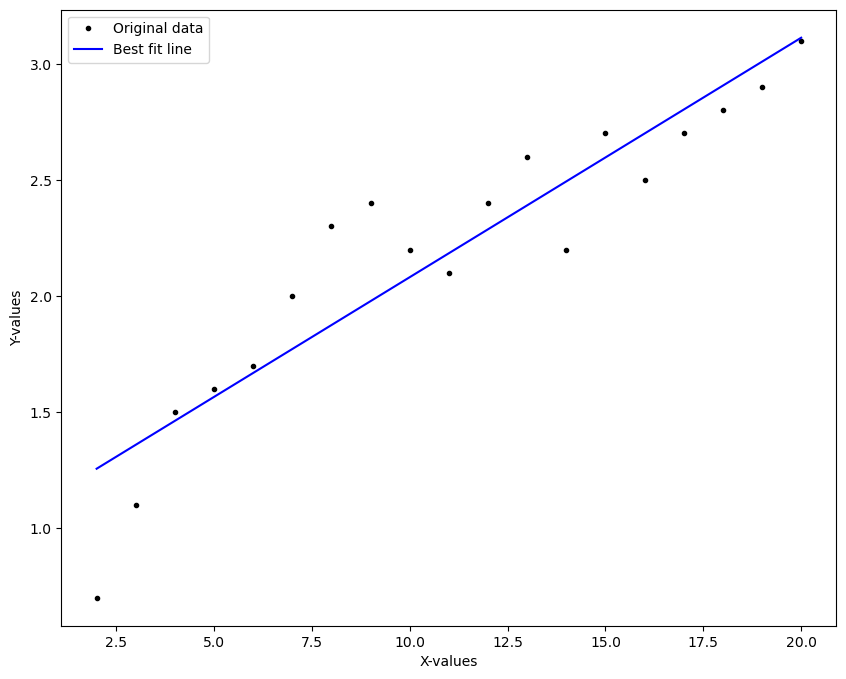

In [25]:
# Plot the best fit line.

plt.plot(w, d, 'k.', label='Original data')
plt.plot(w, m * w + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.legend()

# Show the plot.
plt.show()

This 'best-fit' line looks quite close to me. From the lectures, we discussed having a similar number of points on either side of the line, which we have in this case.

<h4 style="color: #001a79;">Method 2 (SciPy Optimise)</h4>


In [27]:
#Lets bring in our required packages again
import scipy.optimize as so

# Numerical arrays.
import numpy as np

In [28]:
# for clarity, let's bring in our datapoints to this section
x = np.arange(2.0, 21.0, 1.0) # changing our type to prevent 'TypeError'
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]


In [29]:
# The function to be minimized - the cost function.
# It must take a single argument! But our cost function takes 2: m and c.
# So, we'll put them in a list called MC. e.g. MC = (0.1, 1.0). This is taken from our earlier result.
def cost(MC):
    # Unpack the values m and c.
    m, c = MC
    # We need the data points in this function.
    cost = np.sum((y - m * x - c)**2)
    # Return that value.
    return cost


In [30]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
result = so.minimize(cost, (0.1, 1.0))
# Show the results.
result

      fun: 1.0395789473686226
 hess_inv: array([[ 0.00546701, -0.07256159],
       [-0.07256159,  0.99479589]])
      jac: array([ 1.26659870e-06, -1.86264515e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([0.10315788, 1.0494738 ])

In [31]:
# Extract the optimized m and c. Ideally, this is the same result as our 'analytical' results.
m_o, c_o = result.x
# Print them.
m_o, c_o

(0.10315787899533252, 1.0494738010760316)

In [32]:
# Previous, analytical result.
m_a, c_a = np.polyfit(w, d, 1)
# Print analytical results.
m_a, c_a

(0.10315789473684209, 1.0494736842105263)

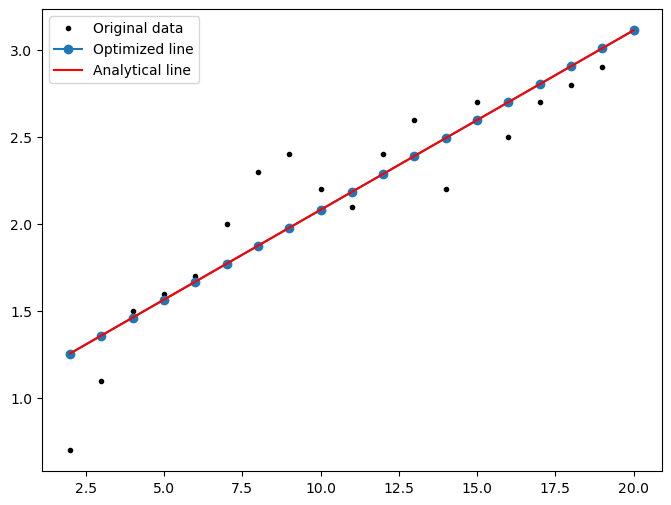

In [33]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_o * x + c_o, 'o-', label='Optimized line')
ax.plot(x, m_a * x + c_a, 'r-', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()

We can only see 1 line, this is because our lines are the same as we got the same result from 'analytical' and 'optimised'. I have set the optimised line to have circles at each point in order to demonstrate they are the same.

<h4 style="color: #001a79;">Method 3(Curve Fitting)</h4>


In [35]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# Create the model function.
def f(x, m, c):
    return m * x + c

In [36]:
# Run curve_fit.
result = so.curve_fit(f, x, y)


In [37]:
# Look at the result.
result

(array([0.10315789, 1.04947369]),
 array([[ 0.00010728, -0.00118012],
        [-0.00118012,  0.01619984]]))

In [38]:
# Pull out the parameters that we require for plotting.
m_f, c_f = result[0]
# Print values.
m_f, c_f

(0.10315789458399933, 1.0494736859688867)

Initial inspection shows they are the same value for m and c we have been getting thus far - good news.

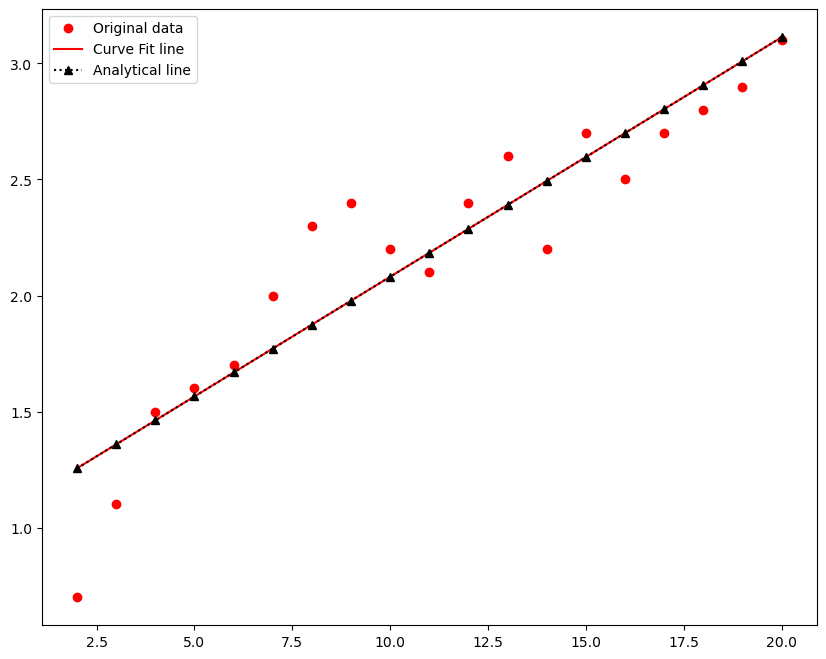

In [39]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x, y, 'or', label='Original data')
ax.plot(x, m_f * x + c_f, 'r-', label='Curve Fit line')
ax.plot(x, m_a * x + c_a, '^k:', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()

Once again, we can see the optimised and analytical line are the same.
In summary, I don't really think a straight line is a good model for these points as even the optimised 'best fit line' doesn't really seem to be that representative of the spead of data.  